# Dillon, Colorado Climate Analysis via Snowfall Measurements

## Site Description:

[Dillon, Colorado](https://en.wikipedia.org/wiki/Dillon,_Colorado) is in Summit County and is [near the cities of Silverthorne, Frisco, and Breckenridge](https://www.google.com/maps/place/Dillon,+CO/@39.6227979,-106.0392849,14z/data=!3m1!4b1!4m6!3m5!1s0x876a56970bb0e355:0xd821373c4991fa7f!8m2!3d39.6302643!4d-106.0433518!16zL20vMHJjczU?entry=ttu&g_ep=EgoyMDI0MDkxOC4xIKXMDSoASAFQAw%3D%3D). Dillon sits at an elevation of about 9,019 feet above sea level in the Rocky Mountains. Along with Silverthorne and Frisco, Dillon borders the [Dillon Reservoir](https://en.wikipedia.org/wiki/Dillon_Reservoir), which is controled by Denver Water. The Reservoir supplies many residents of Denver, CO and surrounding cities with fresh water while also being a source of recreation such as kayaking and hiking. The city of Dillon is located on the land of the [Ute indigenous people](https://native-land.ca/maps/territories/ute/). 

I have chosen to analyze Dillon, CO for a couple of reasons. One of my favorite ski areas, Arapahoe Basin, is in Dillon so I'm curious to see how the amount of snowfall has changed, if at all, throughout about the last 130 years. Snowfall is a crucial factor in ski areas' health. Snowfall also plays such an important role in the ecosystem both in the winter when the snow happens and throughout the rest of the year when the snow melts.

## Data Description:

For this climate analysis, I'll use data from the Global Historical Climatology Network - Daily (GHCND). The GHCND data is collected from 90,000 land-based stations worldwide. The data is collected with two instruments: rain gauges and thermometers. The data is taken from worldwide National Meteorological and Hydrological Centers (NMHCs), through official bilateral agreements, and from a number of data archives at National Centers for Environmental Information (NCEI). The snowfall measurement is in either millimeters or inches. This data set is being used because of how expansive it is - both in terms of how many locations are included and in terms of how long the data has been collected for. For some sites, data has been collected for more than 175 years. Also, this data undergoes a variety of quality control checks.

For the Dillon, CO analysis, I will be using data collected at station USC00052281. The name of the station is DILLON 1 E, CO US and it is located at 39.62455°, -106.03353° with an elevation of 9,081 feet above sea level. The station is currently active and started collecting data on January 1, 1893 with Precipitation and Snowfall measurements. The station currently collects three air temperature measurements and three precipitation measurements. I will specifidally be analyzing the Snowfall measurements in millimeters from October 1, 1909 to September 30, 2023. I chose these dates because full [water years](https://water.usgs.gov/nwc/explain_data.html) will be included and when I tried importing the data below starting with October 1, 1893, the first row of the data frame was in May 1909. So I assume something happened to the 1893-1908 Snowfall measurements and just decided to start in 1909.

Citation: 
* Menne, Matthew J., Imke Durre, Bryant Korzeniewski, Shelley McNeill, Kristy Thomas, Xungang Yin, Steven Anthony, Ron Ray, Russell S. Vose, Byron E.Gleason, and Tamara G. Houston (2012): Global Historical Climatology Network - Daily (GHCN-Daily), Version 3. Boulder, Colorado Station USC00050848. NOAA National Climatic Data Center. doi:10.7289/V5D21VHZ. Accessed: 2024-09-22.
* Matthew J. Menne, Imke Durre, Russell S. Vose, Byron E. Gleason, and Tamara G. Houston, 2012: An Overview of the Global Historical Climatology Network-Daily Database. J. Atmos. Oceanic Technol., 29, 897-910. doi:10.1175/JTECH-D-11-00103.1.

## Methods Overview:

In [1]:
# Import required package (pandas), holoviews library to create interactive plots, and hvplot.pandas to help save plots.
# Import matplotlib.pyplot, seaborn, and sklearn.linear_model are to create a plot with a trend line. 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import holoviews as hv
import hvplot.pandas 
from sklearn.linear_model import LinearRegression

In [2]:
# Create the url to access the snowfall data from Dillon, CO station USC00052281.

dillon_snow_ghcnd_url = (
    'https://www.ncei.noaa.gov/access/services/data/v1'
    '?dataset=daily-summaries'
    '&dataTypes=SNOW'
    '&stations=USC00052281'
    '&units=metric'
    '&startDate=1909-10-01'
    '&endDate=2023-09-30'
    )

dillon_snow_ghcnd_url

'https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&dataTypes=SNOW&stations=USC00052281&units=metric&startDate=1909-10-01&endDate=2023-09-30'

In [3]:
# Import SNOW data into Python from NCEI API for Dillon, Colorado station USC00052281.

dillon_snow_df = pd.read_csv(
    dillon_snow_ghcnd_url,
    index_col='DATE',
    parse_dates=True,
    na_values=['NaN'])

dillon_snow_df


,STATION,SNOW
DATE,,
1909-10-01,USC00052281,0.0
1909-10-02,USC00052281,0.0
1909-10-03,USC00052281,0.0
1909-10-04,USC00052281,0.0
1909-10-05,USC00052281,0.0
...,...,...
2023-09-26,USC00052281,0.0
2023-09-27,USC00052281,0.0
2023-09-28,USC00052281,0.0


In [4]:
# Clean data frame to remove the 'STATION' column.

dillon_snow_clean_df = dillon_snow_df[['SNOW']]

dillon_snow_clean_df

,SNOW
DATE,
1909-10-01,0.0
1909-10-02,0.0
1909-10-03,0.0
1909-10-04,0.0
1909-10-05,0.0
...,...
2023-09-26,0.0
2023-09-27,0.0
2023-09-28,0.0


In [5]:
# Rename SNOW column to include units.

dillon_snow_units_df = dillon_snow_clean_df.rename(columns={
    'SNOW' : 'SNOW (mm)'
    })

dillon_snow_units_df

,SNOW (mm)
DATE,
1909-10-01,0.0
1909-10-02,0.0
1909-10-03,0.0
1909-10-04,0.0
1909-10-05,0.0
...,...
2023-09-26,0.0
2023-09-27,0.0
2023-09-28,0.0


In [6]:
# Add column to dataframe with snowfall units in inches by dividing the millimeter measurements by 25.4.

dillon_snow_units_df['SNOW (in)'] = dillon_snow_units_df['SNOW (mm)'] / 25.4

dillon_snow_units_df

,SNOW (mm),SNOW (in)
DATE,,
1909-10-01,0.0,0.0
1909-10-02,0.0,0.0
1909-10-03,0.0,0.0
1909-10-04,0.0,0.0
1909-10-05,0.0,0.0
...,...,...
2023-09-26,0.0,0.0
2023-09-27,0.0,0.0
2023-09-28,0.0,0.0


In [7]:
# Create dataframe with just inches column.

dillon_snow_in_df = dillon_snow_units_df[['SNOW (in)']]

dillon_snow_in_df

,SNOW (in)
DATE,
1909-10-01,0.0
1909-10-02,0.0
1909-10-03,0.0
1909-10-04,0.0
1909-10-05,0.0
...,...
2023-09-26,0.0
2023-09-27,0.0
2023-09-28,0.0


In [8]:
# Create data frame with just millimeters column.

dillon_snow_mm_df = dillon_snow_units_df[['SNOW (mm)']]

dillon_snow_mm_df

,SNOW (mm)
DATE,
1909-10-01,0.0
1909-10-02,0.0
1909-10-03,0.0
1909-10-04,0.0
1909-10-05,0.0
...,...
2023-09-26,0.0
2023-09-27,0.0
2023-09-28,0.0


<Axes: title={'center': 'Daily Snowfall in millimeters in Dillon, Colorado from October 1, 1909 to September 30, 2023'}, xlabel='Date', ylabel='Snowfall (mm)'>

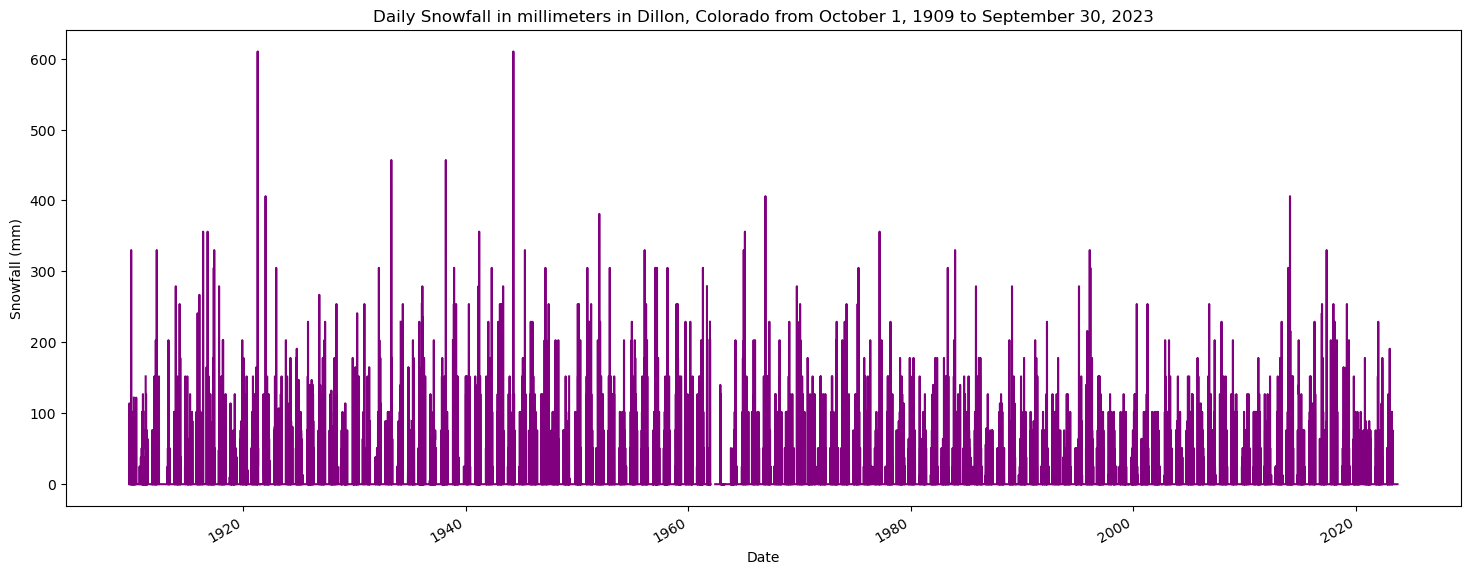

In [9]:
# Create a basic plot of the dillon_snow_mm_df.

dillon_snow_mm_df.plot(
    title = 'Daily Snowfall in millimeters in Dillon, Colorado from October 1, 1909 to September 30, 2023',
    xlabel = 'Date',
    ylabel = 'Snowfall (mm)',
    legend = False,
    figsize = (18,7),
    color = "purple"
)

<Axes: title={'center': 'Daily Snowfall in inches in Dillon, Colorado from October 1, 1909 to September 30, 2023'}, xlabel='Date', ylabel='Snowfall (in)'>

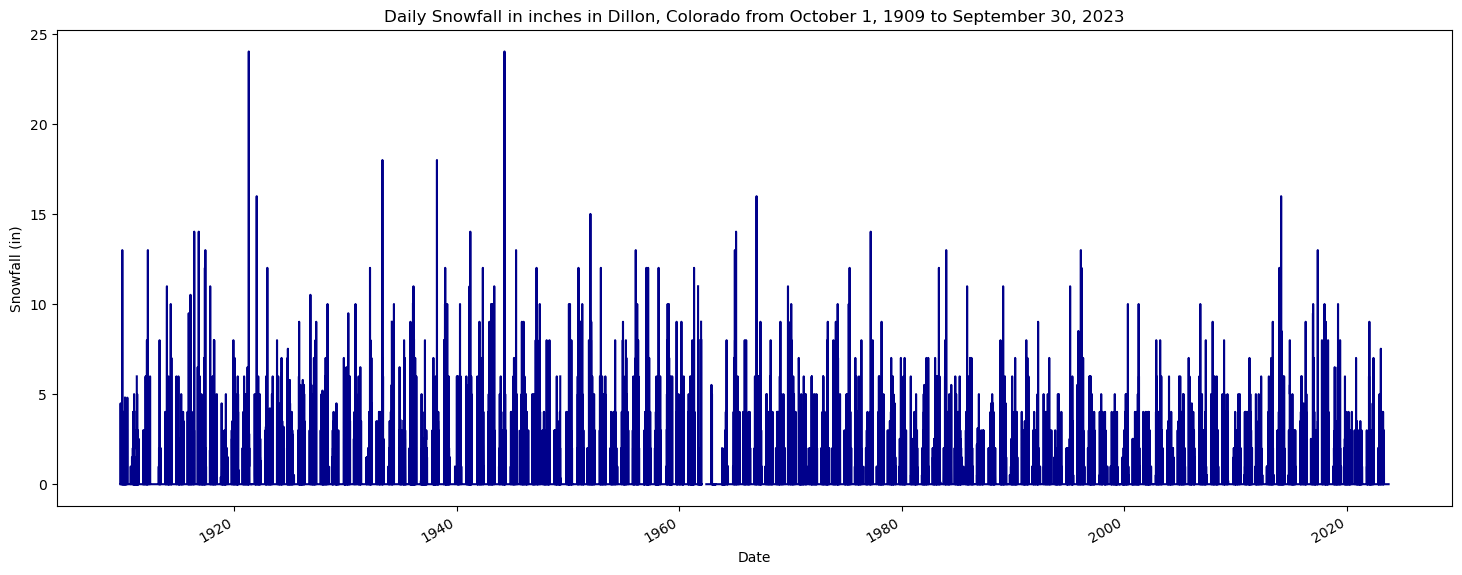

In [10]:
# Create a basic plot of the dillon_snow_in_df.

dillon_snow_in_df.plot(
    title = 'Daily Snowfall in inches in Dillon, Colorado from October 1, 1909 to September 30, 2023',
    xlabel = 'Date',
    ylabel = 'Snowfall (in)',
    legend = False,
    figsize = (18,7),
    color = "darkblue"
)

In [29]:
# Resample dillon_snow_mm_df to find the yearly average snowfall in millimeters for each annual water year from October 1 to September 30.

dillon_ann_snow_mm_df = dillon_snow_mm_df.resample('A-SEP').mean()

dillon_ann_snow_mm_df


,SNOW (mm)
DATE,
1910-09-30,5.465181
1911-09-30,4.243243
1912-09-30,10.210332
1913-09-30,2.598131
1914-09-30,8.704110
...,...
2019-09-30,10.586301
2020-09-30,7.860656
2021-09-30,6.232877


<Axes: title={'center': 'Yearly Average Snowfall in millimeters in Dillon, Colorado from 1909 to 2023'}, xlabel='Year', ylabel='Snowfall (mm)'>

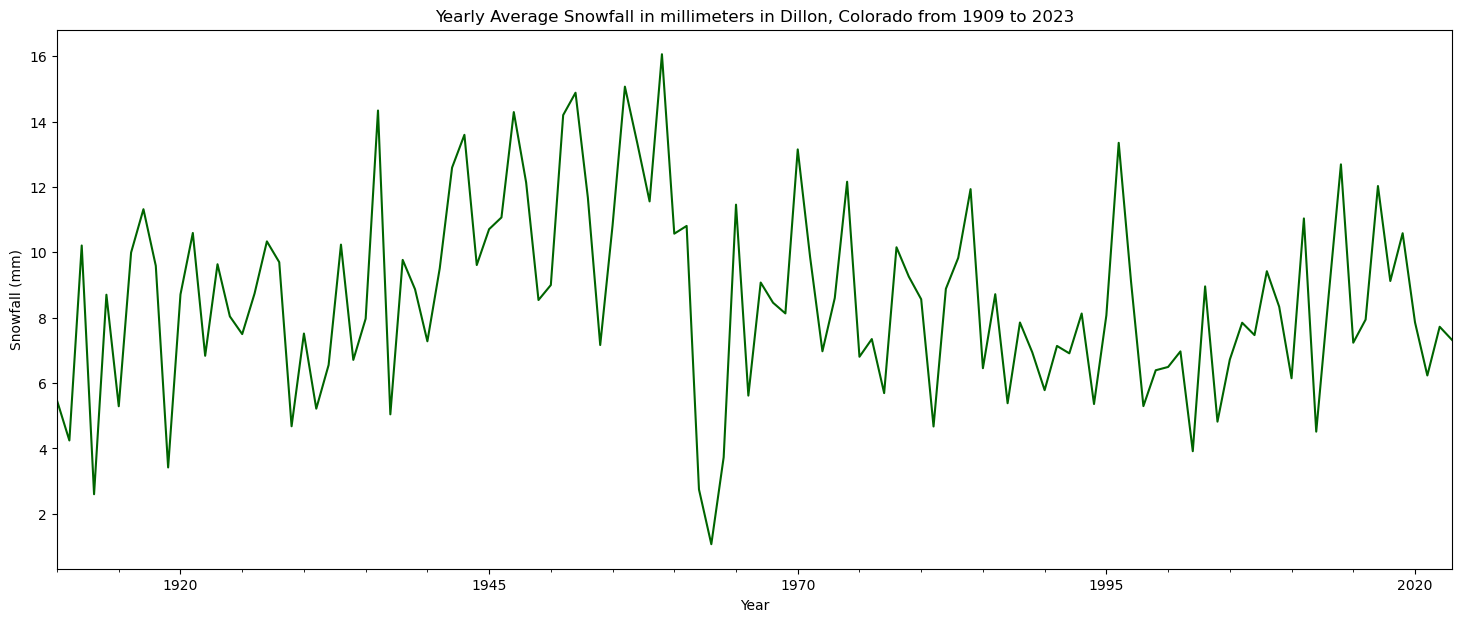

In [30]:
# Create a plot of the yearly average snowfall in mm in Dillon (dillon_ann_snow_mm_df).

dillon_ann_snow_mm_df.plot(
    title = 'Yearly Average Snowfall in millimeters in Dillon, Colorado from 1909 to 2023',
    xlabel = 'Year',
    ylabel = 'Snowfall (mm)',
    legend = False,
    figsize = (18,7),
    color = "darkgreen"
)

In [31]:
# Create an interacitve plot of dillon_ann_snow_mm_df.

interactive_dillon_ann_snow_mm_df = dillon_ann_snow_mm_df.hvplot(
    title = 'Yearly Average Snowfall in millimeters in Dillon, Colorado from 1909 to 2023',
    xlabel = 'Year',
    ylabel = 'Snowfall (mm)',
    figsize=(25,7),
    legend=False,
    color="darkgreen")

interactive_dillon_ann_snow_mm_df

/opt/conda/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
/opt/conda/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:Curve   [DATE]   (SNOW (mm))

In [32]:
# Save Interactive plot

hv.save(interactive_dillon_ann_snow_mm_df, 'Yearly Average Snowfall in millimeters in Dillon, Colorado from 1909 to 2023 Interactive Plot.html')

/opt/conda/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
/opt/conda/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


# Regression Plot

<Axes: ylabel='Frequency'>

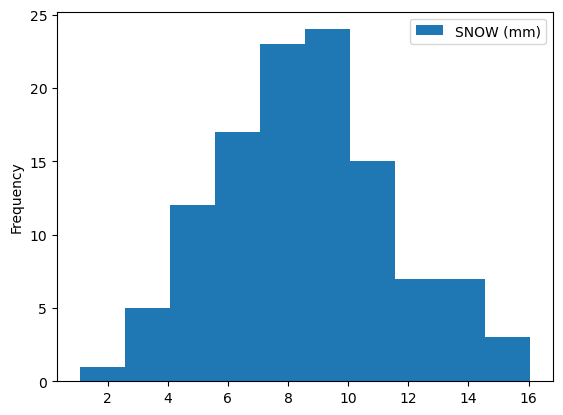

In [33]:
dillon_ann_snow_mm_df.plot.hist()

In [34]:
# Reset index

dillon_ann_snow_mm_regr = dillon_ann_snow_mm_df.reset_index()
dillon_ann_snow_mm_regr

,DATE,SNOW (mm)
0,1910-09-30,5.465181
1,1911-09-30,4.243243
2,1912-09-30,10.210332
3,1913-09-30,2.598131
4,1914-09-30,8.704110
...,...,...
109,2019-09-30,10.586301
110,2020-09-30,7.860656
111,2021-09-30,6.232877
112,2022-09-30,7.723288


In [43]:
# Reshape 'Year' column to be a 2D array for scikit-learn
X = dillon_ann_snow_mm_regr['DATE'].dt.year.values.reshape(-1, 1) #try adding .dt; reshape is part of scikitlearn to make sure the matricies of data are going the right direction; scikitlearn reads dates as "how many seconds since that date" so adding the .dt lets you access specific different parts of the dates so you actually get just the years, not the whole seconds amount.
y = dillon_ann_snow_mm_regr['SNOW (mm)'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")


Slope: -0.007445981343876173
Intercept: 23.21674790576322


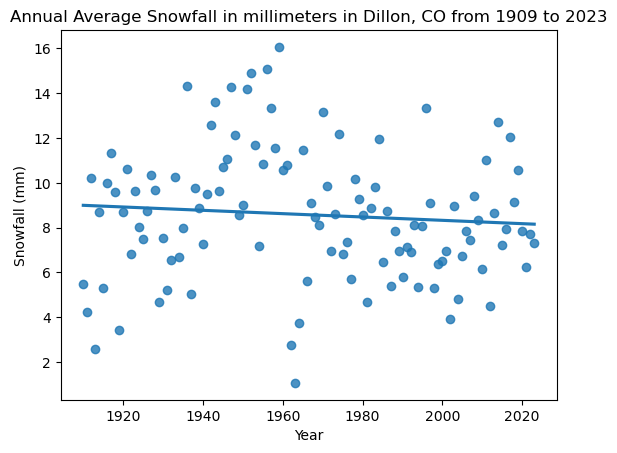

In [36]:
#Plot annual average temperature data with a trend line
ax = sns.regplot(
    x = dillon_ann_snow_mm_regr.DATE.dt.year, 
    y = dillon_ann_snow_mm_regr['SNOW (mm)'].values,
    ci = None
    )

# Set plot labels
ax.set(
    title = 'Annual Average Snowfall in millimeters in Dillon, CO from 1909 to 2023',
    xlabel = 'Year',
    ylabel = 'Snowfall (mm)'
)

# Display the plot without extra text
plt.show()

